In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
g = 9.8155
l = 121/1000
m_err = 1
l_err = 1/1000

In [12]:
data_raw = pd.read_csv('data.csv')
data_raw['T'] = (data_raw['t'] / data_raw['N'])

data_raw['T'] = data_raw['T'].round(1)
print(data_raw.style.to_latex())

\begin{tabular}{lrrrrrr}
 & m & N & t & A & A_err & T \\
0 & 342 & 11 & 335 & 9 & 1 & 30.500000 \\
1 & 342 & 12 & 365 & 9 & 1 & 30.400000 \\
2 & 274 & 11 & 419 & 10 & 1 & 38.100000 \\
3 & 274 & 11 & 414 & 10 & 1 & 37.600000 \\
4 & 220 & 8 & 378 & 10 & 1 & 47.200000 \\
5 & 220 & 10 & 468 & 10 & 1 & 46.800000 \\
6 & 179 & 7 & 406 & 10 & 1 & 58.000000 \\
7 & 179 & 7 & 408 & 10 & 1 & 58.300000 \\
8 & 142 & 5 & 368 & 10 & 1 & 73.600000 \\
9 & 142 & 6 & 441 & 10 & 1 & 73.500000 \\
\end{tabular}



In [13]:
data = pd.read_csv('m_T.csv')
data['T'] = data['T'].round(1)
data['T_err'] = (0.01 * data['T']).round(1)
data['W']=(2*np.pi/data['T']).round(3)
data['W_err'] = (0.01 * data['W']).round(3)
data['M'] = (data['m']*g*l/1000).round(3)
data['M_err'] = (data['M'] * np.sqrt((m_err/data['m'])**2 + (l_err/l)**2)).round(3)
print(data.style.to_latex())

\begin{tabular}{lrrrrrrr}
 & m & T & T_err & W & W_err & M & M_err \\
0 & 142 & 73.600000 & 0.700000 & 0.085000 & 0.001000 & 0.169000 & 0.002000 \\
1 & 179 & 58.100000 & 0.600000 & 0.108000 & 0.001000 & 0.213000 & 0.002000 \\
2 & 220 & 47.000000 & 0.500000 & 0.134000 & 0.001000 & 0.261000 & 0.002000 \\
3 & 274 & 37.900000 & 0.400000 & 0.166000 & 0.002000 & 0.325000 & 0.003000 \\
4 & 342 & 30.400000 & 0.300000 & 0.207000 & 0.002000 & 0.406000 & 0.004000 \\
\end{tabular}



a=0.5145004694190652
b=-0.0013847289963591065


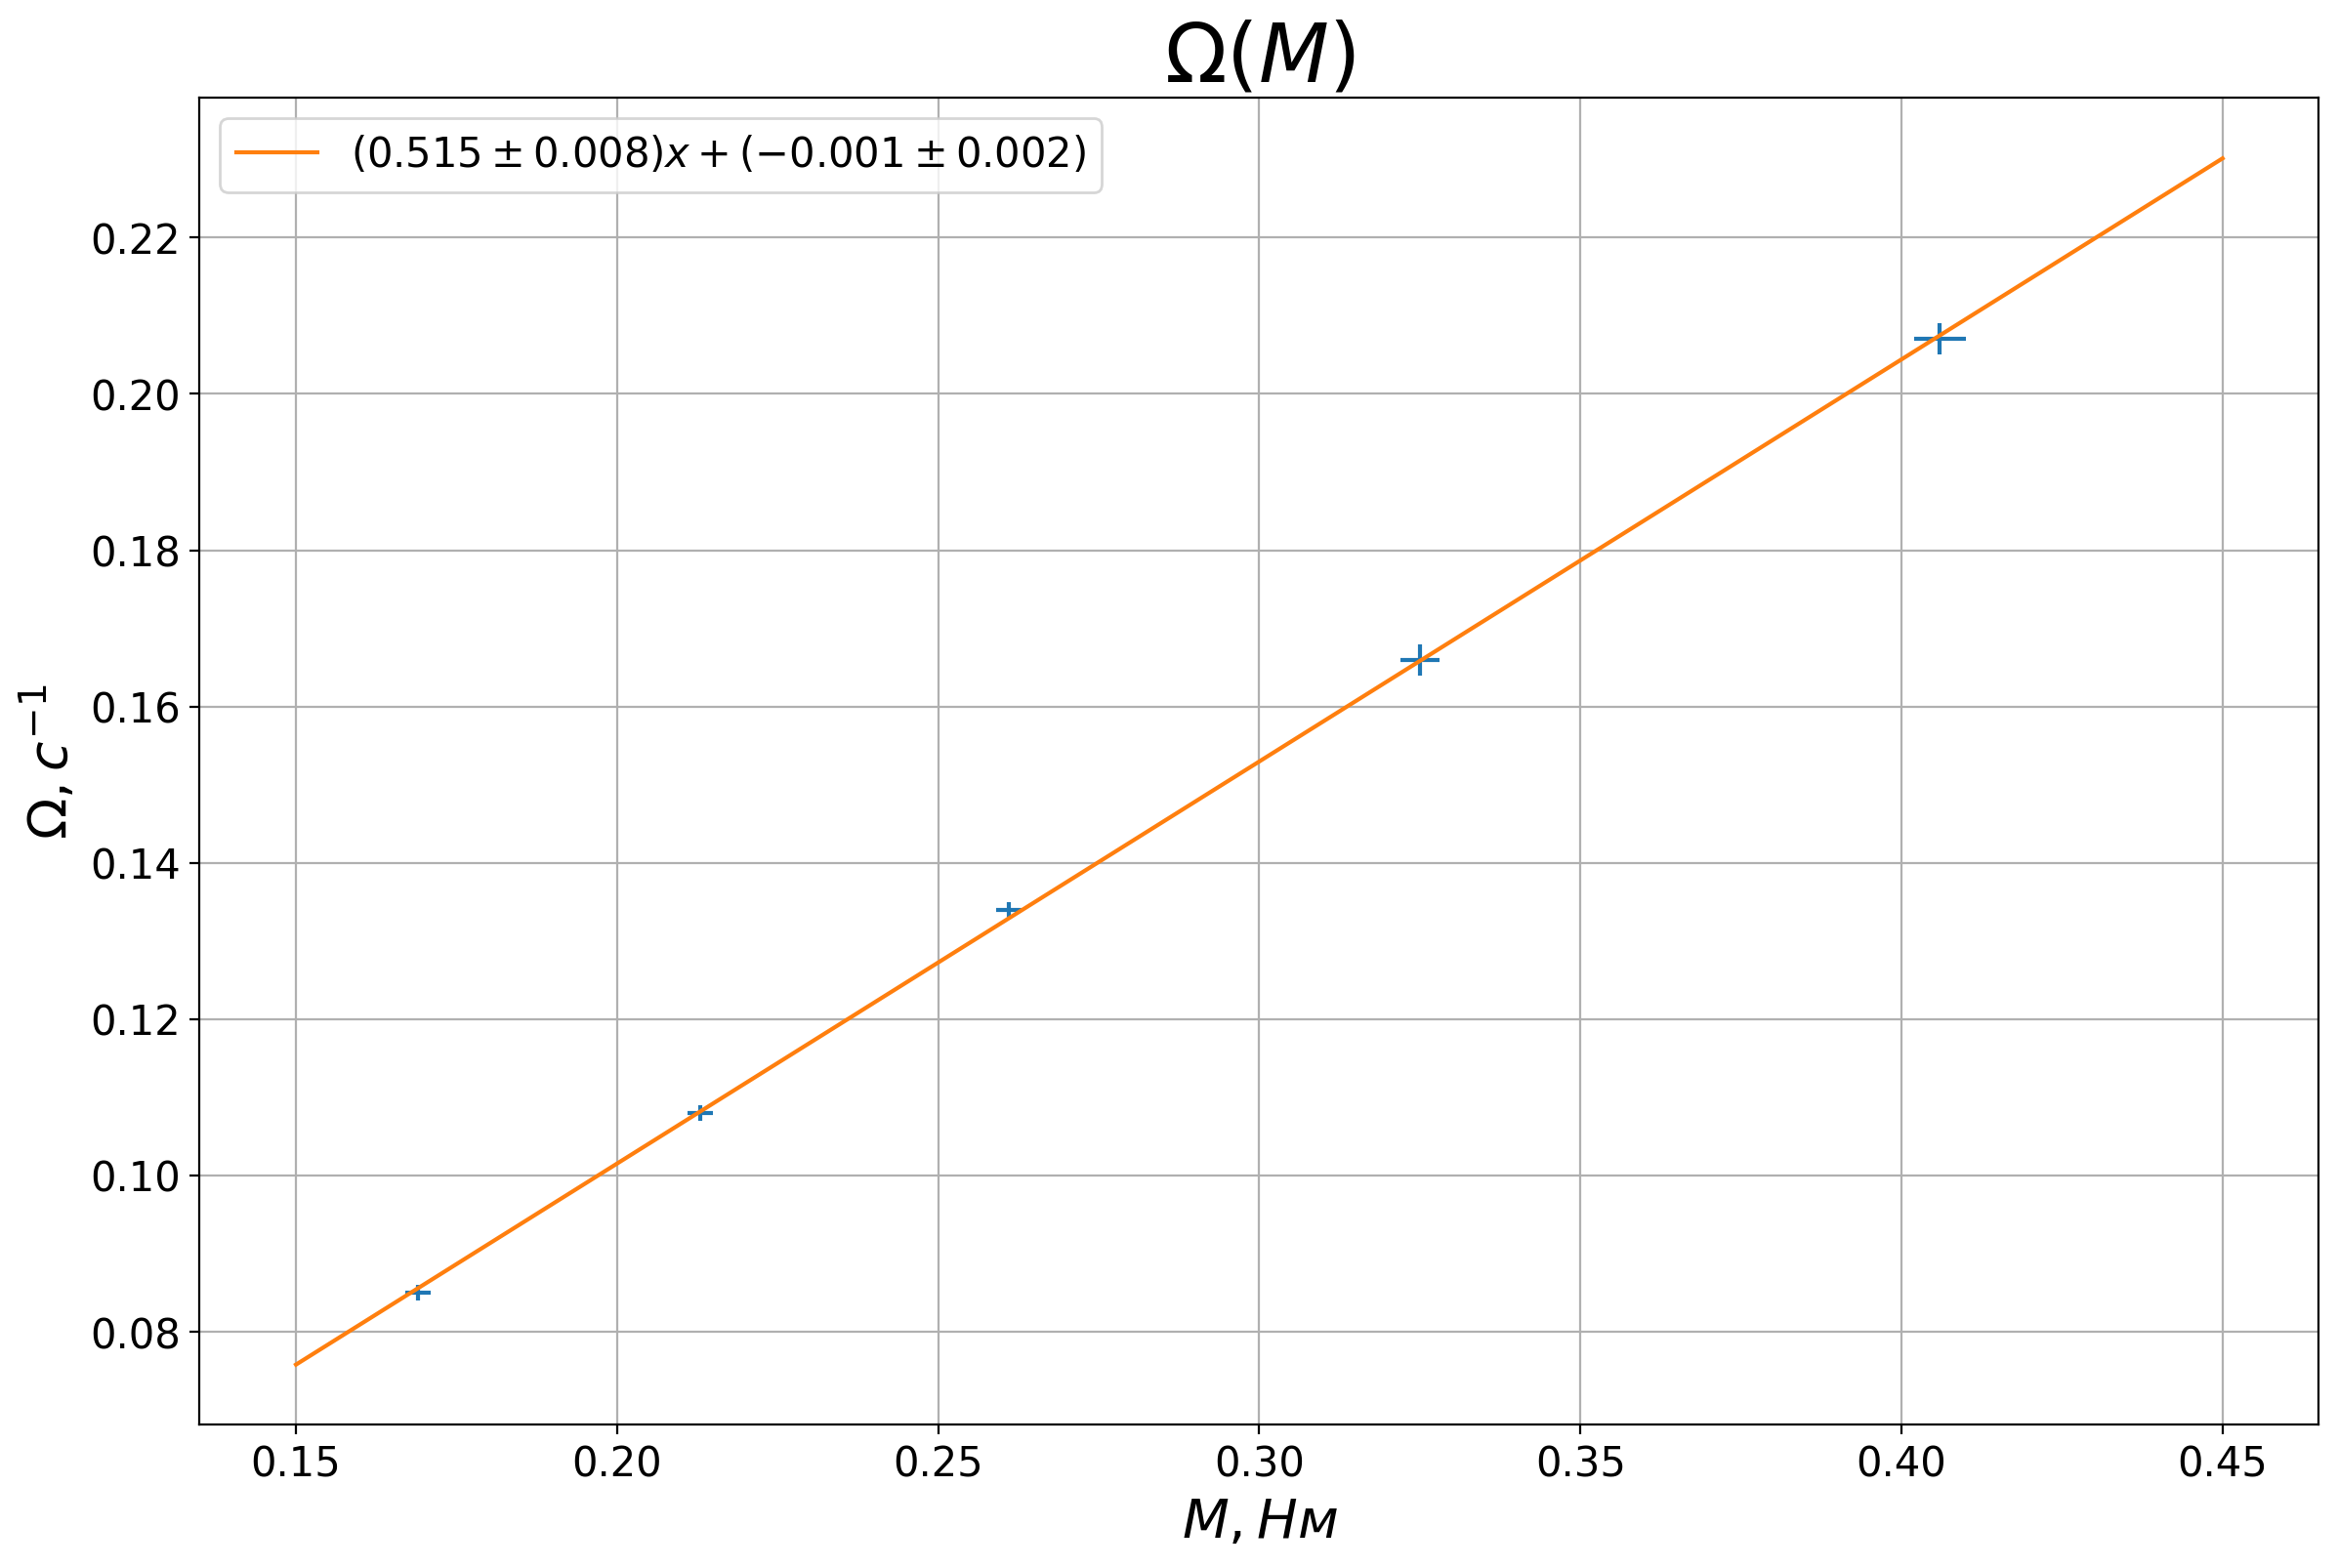

In [23]:
X = data['M']
X_err = data['M_err']

Y = data['W']
Y_err = data['W_err']

a, b = np.polyfit(X, Y, deg=1)

S_x = np.std(X)
S_y = np.std(Y)
N = len(X)
#     R_xy = np.sum(X*Y) / len(X) - np.mean(X) * np.mean(Y)
a_err = 2 * np.sqrt((S_y ** 2 / S_x ** 2 - a ** 2) / (N - 2))
b_err = a_err * np.sqrt(S_x ** 2 + np.mean(X) ** 2)


plt.figure(figsize=(14, 9), dpi=200)

plt.grid(True)
plt.title(r"$\Omega(M)$", fontsize=30)
plt.xlabel(r"$M, Нм$", fontsize=20)
plt.ylabel(r"$\Omega, с^{-1}$", fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.errorbar(X, Y, xerr=X_err, yerr=Y_err, linestyle='')
plt.plot([0.15, 0.45], [0.15*a + b, 0.45*a + b], label=fr'$({a:.3f}\pm{a_err:.1})x+({b:.3f}\pm{b_err:.3f})$')
plt.legend(fontsize=15)
print(f'{a=}')
print(f'{b=}')
plt.savefig('../pictures/plot.png')

In [19]:
L = 1/0.509

In [20]:
M_fr = L*data_raw['A']*np.pi/180/data_raw['t']
M_fr_err = M_fr * (data_raw['A_err']/data_raw['A'])
M_fr, M_fr_err
M_fr
x = pd.DataFrame([M_fr.round(4)*10**4, M_fr_err.round(4)*10**4])
x

,0,1,2,3,4,5,6,7,8,9
0,9.0,8.0,8.0,8.0,9.0,7.0,8.0,8.0,9.0,8.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [21]:
x.iloc[0].mean()

8.2

In [22]:
x.iloc[0].std()

0.6324555320336759